In [386]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Data

In [387]:
data = pd.read_csv('clean_data.csv', ',', keep_default_na=False)

data

C:\Users\yiche\AppData\Local\Temp\ipykernel_11600\1476388686.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv('clean_data.csv', ',', keep_default_na=False)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PriceType
0,60,RL,65.0,8450,Pave,,Reg,Lvl,AllPub,Inside,...,0,,,,0,2,2008,WD,Normal,MEDIUM
1,20,RL,80.0,9600,Pave,,Reg,Lvl,AllPub,FR2,...,0,,,,0,5,2007,WD,Normal,MEDIUM
2,60,RL,68.0,11250,Pave,,IR1,Lvl,AllPub,Inside,...,0,,,,0,9,2008,WD,Normal,MEDIUM
3,70,RL,60.0,9550,Pave,,IR1,Lvl,AllPub,Corner,...,0,,,,0,2,2006,WD,Abnorml,LOW
4,60,RL,84.0,14260,Pave,,IR1,Lvl,AllPub,FR2,...,0,,,,0,12,2008,WD,Normal,MEDIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,,Reg,Lvl,AllPub,Inside,...,0,,,,0,8,2007,WD,Normal,MEDIUM
1456,20,RL,85.0,13175,Pave,,Reg,Lvl,AllPub,Inside,...,0,,MnPrv,,0,2,2010,WD,Normal,MEDIUM
1457,70,RL,66.0,9042,Pave,,Reg,Lvl,AllPub,Inside,...,0,,GdPrv,Shed,2500,5,2010,WD,Normal,MEDIUM
1458,20,RL,68.0,9717,Pave,,Reg,Lvl,AllPub,Inside,...,0,,,,0,4,2010,WD,Normal,LOW


In [388]:
data.dtypes

MSSubClass        int64
MSZoning         object
LotFrontage      object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
PriceType        object
Length: 80, dtype: object

# Binarization

In [389]:
data = data.apply(lambda x: pd.factorize(x)[0] if x.dtypes == object else x)

In [390]:
data['PriceType']

0       0
1       0
2       0
3       1
4       0
       ..
1455    0
1456    0
1457    0
1458    1
1459    1
Name: PriceType, Length: 1460, dtype: int64

In [391]:
#data2 = pd.get_dummies(data, columns = ['Alley', 'OverallQual'])
data2 = data.copy()
new_attr_list = list(data2.columns)
new_attr_list.remove('PriceType')
data2 = data2[new_attr_list]
data2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,0,0,8450,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2008,0,0
1,20,0,1,9600,0,0,0,0,0,1,...,0,0,0,0,0,0,5,2007,0,0
2,60,0,2,11250,0,0,1,0,0,0,...,0,0,0,0,0,0,9,2008,0,0
3,70,0,3,9550,0,0,1,0,0,2,...,0,0,0,0,0,0,2,2006,0,1
4,60,0,4,14260,0,0,1,0,0,1,...,0,0,0,0,0,0,12,2008,0,0


In [392]:
data2.columns[1:78]

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Op

In [393]:
num_attribute = ['YearBuilt', 'LotFrontage', 'LotArea']
#num_attribute = data2.columns[1:78]
index_numeric = []

for col in num_attribute:
    index_numeric.append(data2.columns.get_loc(col))

In [394]:
index_numeric

[18, 2, 3]

# Split data

In [395]:
X = np.array(data2.values)
Y = np.array(data['PriceType'].values)

seed = 101
test_size = .3

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [396]:
display(x_train.shape, y_train.shape, x_test.shape, x_train)

(1022, 79)

(1022,)

(438, 79)

array([[  60,    0,    7, ..., 2007,    0,    0],
       [  70,    1,    3, ..., 2010,    0,    0],
       [  20,    0,   63, ..., 2009,    1,    2],
       ...,
       [ 160,    1,   29, ..., 2008,    2,    0],
       [  20,    0,  108, ..., 2009,    0,    0],
       [  20,    0,   10, ..., 2009,    0,    0]], dtype=int64)

## Normalisation

In [397]:
from sklearn.preprocessing import StandardScaler

In [398]:
scaler = StandardScaler()
scaler.fit(x_train[:, index_numeric])
x_train[:, index_numeric] = scaler.transform(x_train[:, index_numeric])
x_test[:, index_numeric] = scaler.transform(x_test[:, index_numeric]) 

In [399]:
x_train

array([[  60,    0,    0, ..., 2007,    0,    0],
       [  70,    1,    0, ..., 2010,    0,    0],
       [  20,    0,    1, ..., 2009,    1,    2],
       ...,
       [ 160,    1,    0, ..., 2008,    2,    0],
       [  20,    0,    3, ..., 2009,    0,    0],
       [  20,    0,    0, ..., 2009,    0,    0]], dtype=int64)

In [400]:
x_train_tmp = pd.DataFrame(x_train, columns=data2.columns)
x_train_tmp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,6,2007,0,0
1,70,1,0,0,0,0,0,0,0,0,...,168,0,0,0,0,0,6,2010,0,0
2,20,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,9,2009,1,2
3,20,0,0,1,0,0,2,0,0,3,...,0,0,0,0,0,0,6,2006,0,0
4,60,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,2009,0,0


In [401]:
x_train_tmp.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1022.0,55.758317,41.860354,20.0,20.0,50.0,70.0,190.0
MSZoning,1022.0,0.321918,0.778688,0.0,0.0,0.0,0.0,4.0
LotFrontage,1022.0,0.242661,0.573509,0.0,0.0,0.0,0.0,3.0
LotArea,1022.0,0.072407,0.860860,-1.0,0.0,0.0,0.0,21.0
Street,1022.0,0.004892,0.069808,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
MiscVal,1022.0,53.414873,585.329446,0.0,0.0,0.0,0.0,15500.0
MoSold,1022.0,6.330724,2.744457,1.0,4.0,6.0,8.0,12.0
YrSold,1022.0,2007.823875,1.323448,2006.0,2007.0,2008.0,2009.0,2010.0
SaleType,1022.0,0.241683,0.807230,0.0,0.0,0.0,0.0,8.0


# Create the model

In [437]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [438]:
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]

    box_labels = [f"{v1}".strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)

def show_result(pred):
    print('Classification report')
    print(classification_report(y_test, pred))
    print('Accuracy:', accuracy_score(y_test, pred))

    categories = ['Medium', 'LOW', 'HIGH']
    make_confusion_matrix(confusion_matrix(y_test, pred), categories=categories, cmap='binary')
    plt.show()

In [439]:
models = []
models.append(('DTentropy', DecisionTreeClassifier(criterion='entropy', random_state=seed)))
models.append(('DTgini', DecisionTreeClassifier(criterion='gini', random_state=seed)))
models.append(('GaussianNaiveBayes', GaussianNB()))
models.append(('NeuralNetwork', MLPClassifier(hidden_layer_sizes=(50, 10, ), max_iter=500, verbose=True, 
                                              random_state=seed)))
models.append(('LinearSVC', LinearSVC(tol=1e-5, random_state=seed)))
models.append(('PolySVC', SVC(kernel='poly', degree=3, C=1, random_state=seed)))
models.append(('RbfSVC', SVC(kernel='rbf', gamma='scale', C=3, random_state=seed)))


## evaluate each model

DTentropy
Classification report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       216
           1       0.81      0.84      0.82       188
           2       0.74      0.76      0.75        34

    accuracy                           0.81       438
   macro avg       0.79      0.80      0.79       438
weighted avg       0.81      0.81      0.81       438

Accuracy: 0.8082191780821918


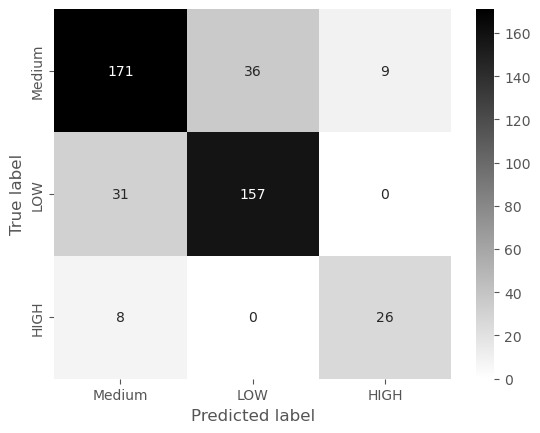

DTgini
Classification report
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       216
           1       0.80      0.79      0.80       188
           2       0.65      0.71      0.68        34

    accuracy                           0.77       438
   macro avg       0.74      0.76      0.75       438
weighted avg       0.77      0.77      0.77       438

Accuracy: 0.773972602739726


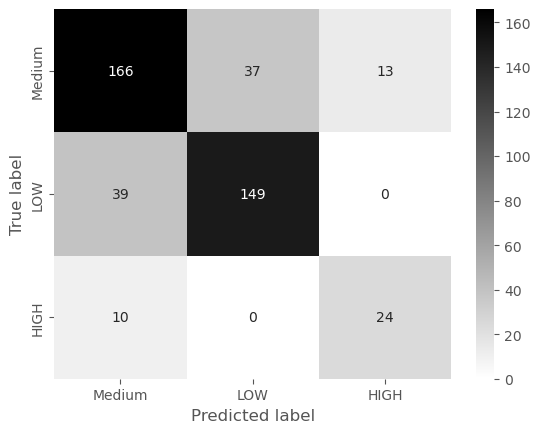

GaussianNaiveBayes
Classification report
              precision    recall  f1-score   support

           0       0.81      0.20      0.32       216
           1       0.80      0.93      0.86       188
           2       0.17      0.82      0.28        34

    accuracy                           0.56       438
   macro avg       0.59      0.65      0.49       438
weighted avg       0.76      0.56      0.55       438

Accuracy: 0.5616438356164384


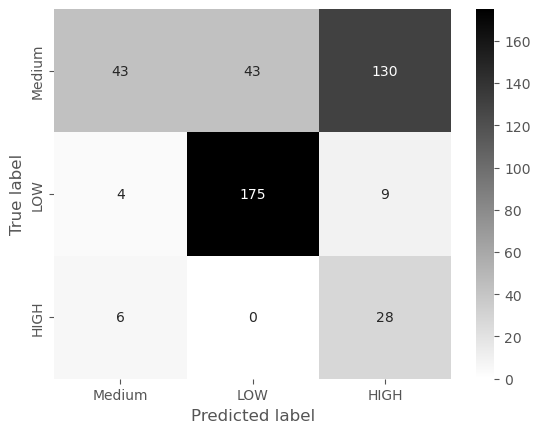

NeuralNetwork
Iteration 1, loss = 15.37960986
Iteration 2, loss = 14.83650892
Iteration 3, loss = 12.67798928
Iteration 4, loss = 11.08547076
Iteration 5, loss = 8.35352617
Iteration 6, loss = 5.54037957
Iteration 7, loss = 3.84264863
Iteration 8, loss = 2.66555230
Iteration 9, loss = 1.66278863
Iteration 10, loss = 1.07504853
Iteration 11, loss = 0.93561821
Iteration 12, loss = 0.90030923
Iteration 13, loss = 0.82701867
Iteration 14, loss = 0.80791065
Iteration 15, loss = 0.78980836
Iteration 16, loss = 0.77395434
Iteration 17, loss = 0.75559541
Iteration 18, loss = 0.75121947
Iteration 19, loss = 0.74145373
Iteration 20, loss = 0.72653738
Iteration 21, loss = 0.71948058
Iteration 22, loss = 0.70412247
Iteration 23, loss = 0.69708832
Iteration 24, loss = 0.68010391
Iteration 25, loss = 0.67353043
Iteration 26, loss = 0.66848777
Iteration 27, loss = 0.65687565
Iteration 28, loss = 0.65931373
Iteration 29, loss = 0.65280331
Iteration 30, loss = 0.63903015
Iteration 31, loss = 0.64420989

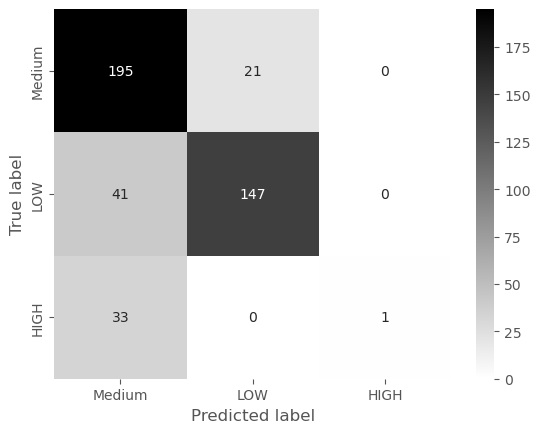

LinearSVC
Classification report
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       216
           1       0.89      0.81      0.85       188
           2       0.67      0.35      0.46        34

    accuracy                           0.81       438
   macro avg       0.78      0.68      0.71       438
weighted avg       0.81      0.81      0.81       438

Accuracy: 0.8127853881278538


c:\Users\yiche\anaconda3\envs\eip\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


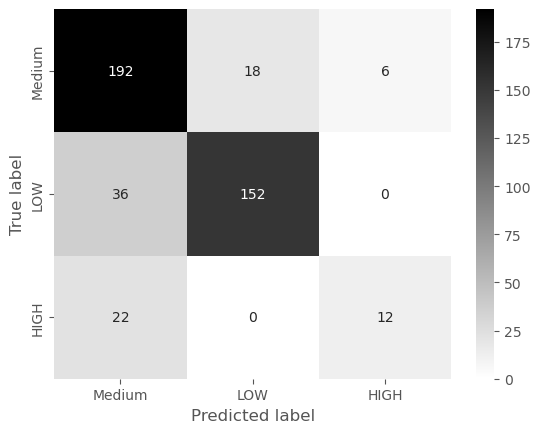

PolySVC
Classification report
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       216
           1       0.84      0.81      0.83       188
           2       0.62      0.44      0.52        34

    accuracy                           0.79       438
   macro avg       0.74      0.69      0.71       438
weighted avg       0.79      0.79      0.79       438

Accuracy: 0.7899543378995434


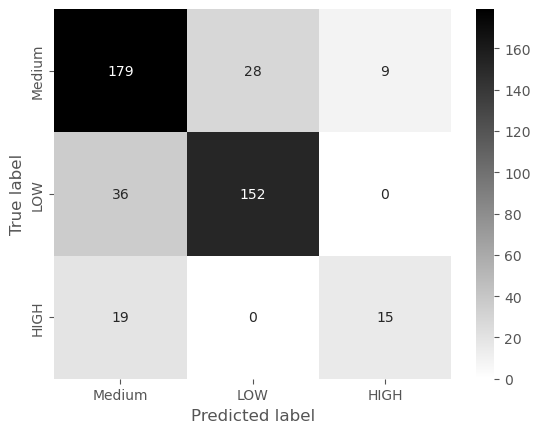

RbfSVC
Classification report
              precision    recall  f1-score   support

           0       0.77      0.85      0.80       216
           1       0.86      0.79      0.82       188
           2       0.68      0.50      0.58        34

    accuracy                           0.80       438
   macro avg       0.77      0.71      0.73       438
weighted avg       0.80      0.80      0.79       438

Accuracy: 0.7968036529680366


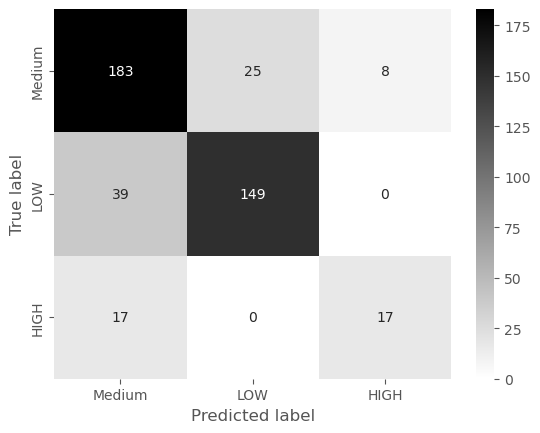

In [440]:
for name, model in models:
    print(name)
    
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)

    show_result(prediction)